In [3]:
!pip install textblob

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [5]:
# Generate a synthetic dataset
np.random.seed(0)
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'text': np.random.choice([
        "I love this product!",
        "This is the worst service ever.",
        "I am very happy with the quality.",
        "The experience was terrible.",
        "I will definitely recommend this to my friends.",
        "Not satisfied with the purchase.",
        "Amazing value for money.",
        "Very disappointed with the support."
    ], 100)
}
df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()

,date,text
0,2023-01-01,I will definitely recommend this to my friends.
1,2023-01-02,Very disappointed with the support.
2,2023-01-03,Not satisfied with the purchase.
3,2023-01-04,I love this product!
4,2023-01-05,The experience was terrible.


In [6]:
# Perform sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['text'].apply(analyze_sentiment)

# Display the first few rows with sentiment
df.head()

,date,text,sentiment
0,2023-01-01,I will definitely recommend this to my friends.,Neutral
1,2023-01-02,Very disappointed with the support.,Negative
2,2023-01-03,Not satisfied with the purchase.,Negative
3,2023-01-04,I love this product!,Positive
4,2023-01-05,The experience was terrible.,Negative


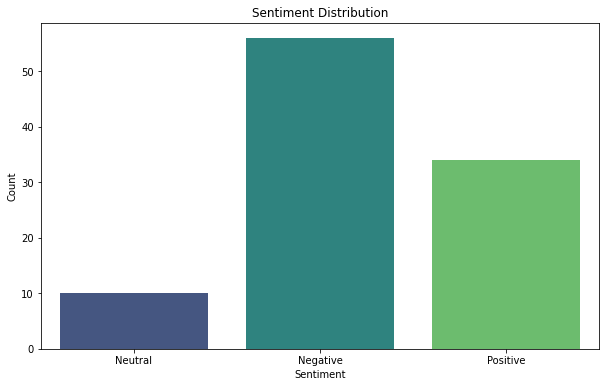

In [7]:
# Visualize sentiment patterns
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

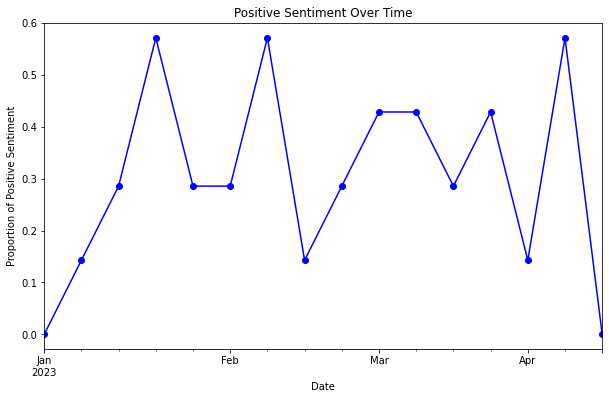

In [8]:
# Plot sentiment over time
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
sentiment_over_time = df.resample('W')['sentiment'].apply(lambda x: x.value_counts(normalize=True).get('Positive', 0))

plt.figure(figsize=(10, 6))
sentiment_over_time.plot(kind='line', marker='o', color='b')
plt.title('Positive Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion of Positive Sentiment')
plt.show()